## Classification Project

classification of mushrooms, based on many features.

## Imports

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV,  Ridge, LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn import neighbors
from mlxtend.classifier import StackingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,  precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 

## Reading Data

In [21]:
df_mushroom = pd.read_csv('mushrooms.csv')

## EDA

In [22]:
df_mushroom.shape

(8124, 23)

In [23]:
df_mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [24]:
df_mushroom.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [25]:
df_mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [26]:
df_mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [27]:
df_mushroom.drop_duplicates()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [28]:
df_mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [29]:
print(df_mushroom.duplicated().sum())

0


In [30]:
df_mushroom.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [31]:
labelencoder=LabelEncoder()
for column in df_mushroom.columns:
    df_mushroom[column] = labelencoder.fit_transform(df_mushroom[column])

In [32]:
df_mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [33]:
df_mushroom.rename(columns={'class':'category'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


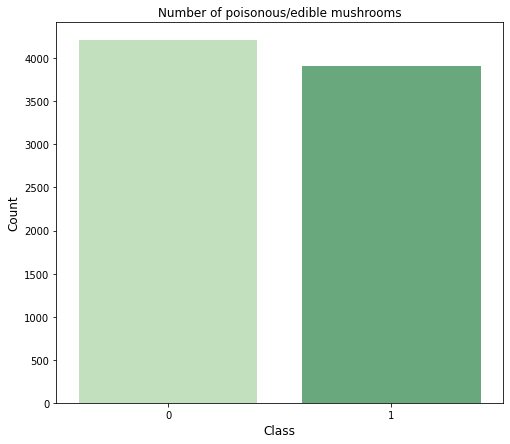

In [34]:
count = df_mushroom['category'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="Greens")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

Text(0.5, 1.0, 'Edible and poisonous mushrooms based on cap-shape')

<Figure size 1440x1440 with 0 Axes>

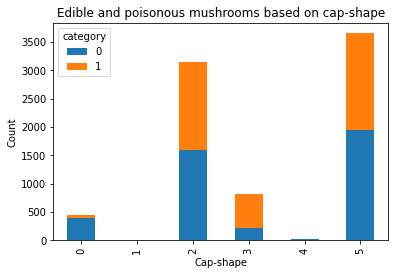

In [35]:
plt.figure(figsize=(20,20))
crosstab=pd.crosstab(df_mushroom['cap-shape'],df_mushroom.category)
crosstab.plot(kind="bar",stacked=True)
plt.xlabel("Cap-shape")
plt.ylabel("Count")
plt.title("Edible and poisonous mushrooms based on cap-shape")

Text(0.5, 1.0, 'Edible and poisonous mushrooms based on ODOR')

<Figure size 432x288 with 0 Axes>

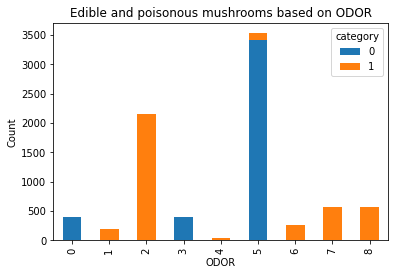

In [36]:
plt.figure()
crosstab=pd.crosstab(df_mushroom['odor'],df_mushroom.category)
crosstab.plot(kind="bar",stacked=True)
plt.xlabel("ODOR")
plt.ylabel("Count")
plt.title("Edible and poisonous mushrooms based on ODOR")

Text(0.5, 1.0, 'Edible and poisonous mushrooms based on gill-attachment')

<Figure size 432x288 with 0 Axes>

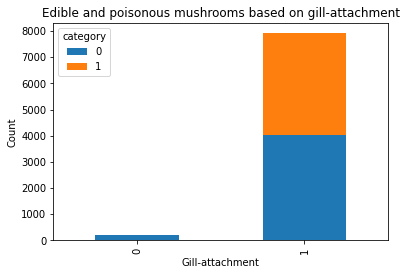

In [37]:
plt.figure()
crosstab=pd.crosstab(df_mushroom['gill-attachment'],df_mushroom.category)
crosstab.plot(kind="bar",stacked=True )
plt.xlabel("Gill-attachment")
plt.ylabel("Count")
plt.title("Edible and poisonous mushrooms based on gill-attachment")

Text(0.5, 1.0, 'Edible and poisonous mushrooms based on gill-color')

<Figure size 432x288 with 0 Axes>

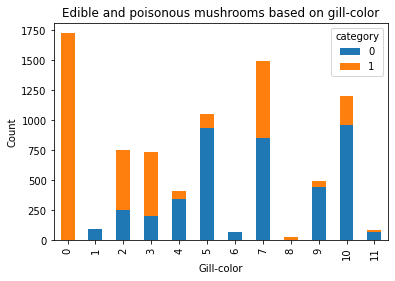

In [38]:
plt.figure()
crosstab=pd.crosstab(df_mushroom['gill-color'],df_mushroom.category)
crosstab.plot(kind="bar",stacked=True)
plt.xlabel("Gill-color")
plt.ylabel("Count")
plt.title("Edible and poisonous mushrooms based on gill-color")

Text(0.5, 1.0, 'Edible and poisonous mushrooms based on stalk-root')

<Figure size 432x288 with 0 Axes>

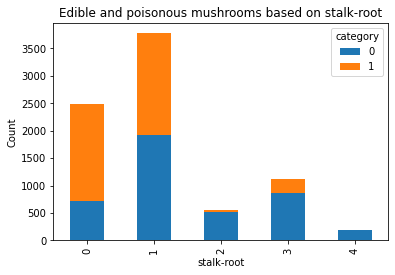

In [39]:
plt.figure()
crosstab=pd.crosstab(df_mushroom['stalk-root'],df_mushroom.category)
crosstab.plot(kind="bar",stacked=True)
plt.xlabel("stalk-root")
plt.ylabel("Count")
plt.title("Edible and poisonous mushrooms based on stalk-root")
## in this plot; type ? corresponds to missing values

Text(0.5, 1.0, 'Edible and poisonous mushrooms based on stalk-color-above-ring')

<Figure size 432x288 with 0 Axes>

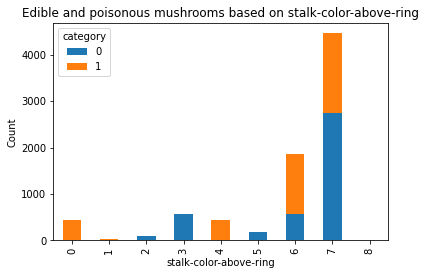

In [40]:
plt.figure()
crosstab=pd.crosstab(df_mushroom['stalk-color-above-ring'],df_mushroom.category)
crosstab.plot(kind="bar",stacked=True)
plt.xlabel("stalk-color-above-ring")
plt.ylabel("Count")
plt.title("Edible and poisonous mushrooms based on stalk-color-above-ring")

Text(0.5, 1.0, 'Edible and poisonous mushrooms based on stalk-color-below-ring')

<Figure size 432x288 with 0 Axes>

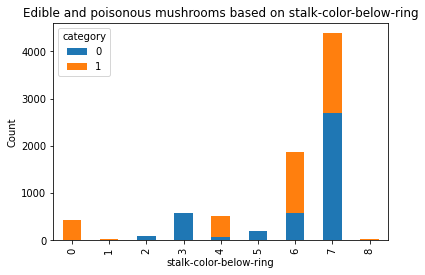

In [41]:
plt.figure()
crosstab=pd.crosstab(df_mushroom['stalk-color-below-ring'],df_mushroom.category)
crosstab.plot(kind="bar",stacked=True)
plt.xlabel("stalk-color-below-ring")
plt.ylabel("Count")
plt.title("Edible and poisonous mushrooms based on stalk-color-below-ring")

Text(0.5, 1.0, 'Edible and poisonous mushrooms based on ring-type')

<Figure size 432x288 with 0 Axes>

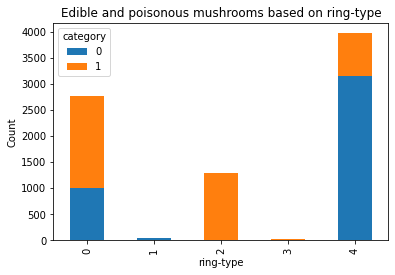

In [42]:
plt.figure()
crosstab=pd.crosstab(df_mushroom['ring-type'],df_mushroom.category)
crosstab.plot(kind="bar",stacked=True)
plt.xlabel("ring-type")
plt.ylabel("Count")
plt.title("Edible and poisonous mushrooms based on ring-type")

In [43]:
df_mushroom['category'].value_counts()

0    4208
1    3916
Name: category, dtype: int64

In [44]:
#df_mushroom=df_mushroom.drop(["veil-type"],axis=1)

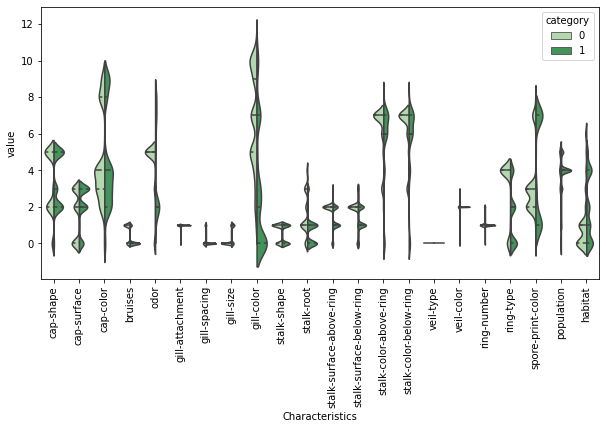

In [45]:
df_div = pd.melt(df_mushroom, "category", var_name="Characteristics") # palette = "crest"
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="category", split = True, data=df_div, inner = 'quartile', palette = 'Greens')
df_no_class = df_mushroom.drop(["category"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));


<Figure size 1008x432 with 0 Axes>

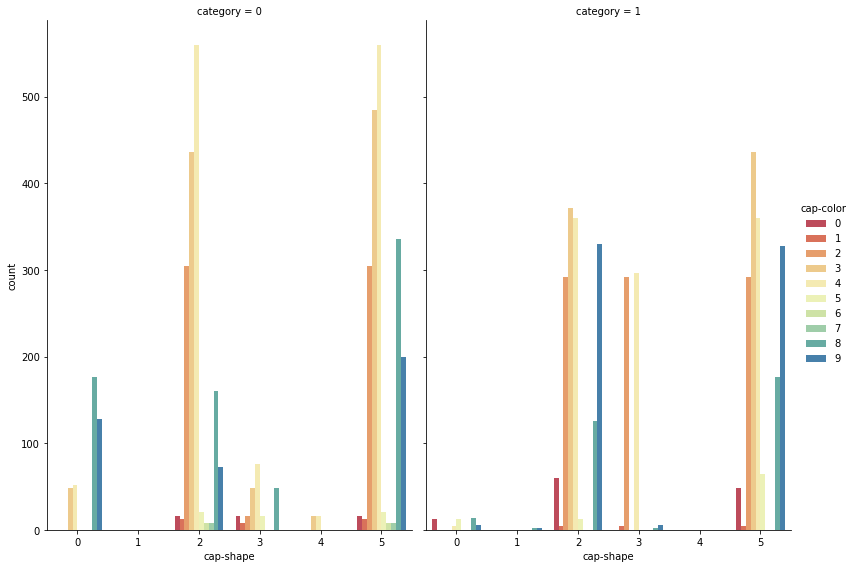

In [96]:

#Plotting the cap-shape in a cat plot
#cap-color: brown=n, buff=b,cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
#cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

plt.figure(figsize =(14, 6))

g = sns.catplot(x = "cap-shape", hue = "cap-color", col = "category",
               data = df_mushroom, kind = "count", 
                height = 8, aspect = .7 ,  palette = "Spectral")



<Figure size 1008x432 with 0 Axes>

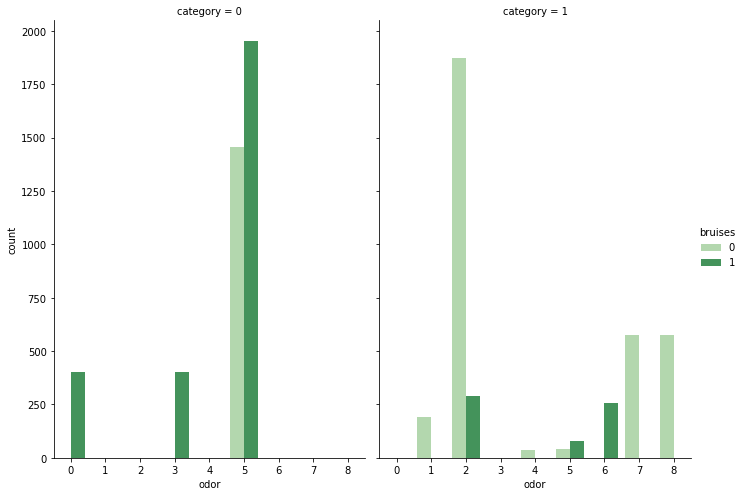

In [47]:

#odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
#bruises: bruises=t, no=f

#ploting odour in catplot , palette="ch:.25"

plt.figure(figsize = (14,6))
g = sns.catplot(x= "odor", hue = "bruises", col = "category",
               data = df_mushroom, kind = "count",
               height = 7, aspect = .7, palette = "Greens")

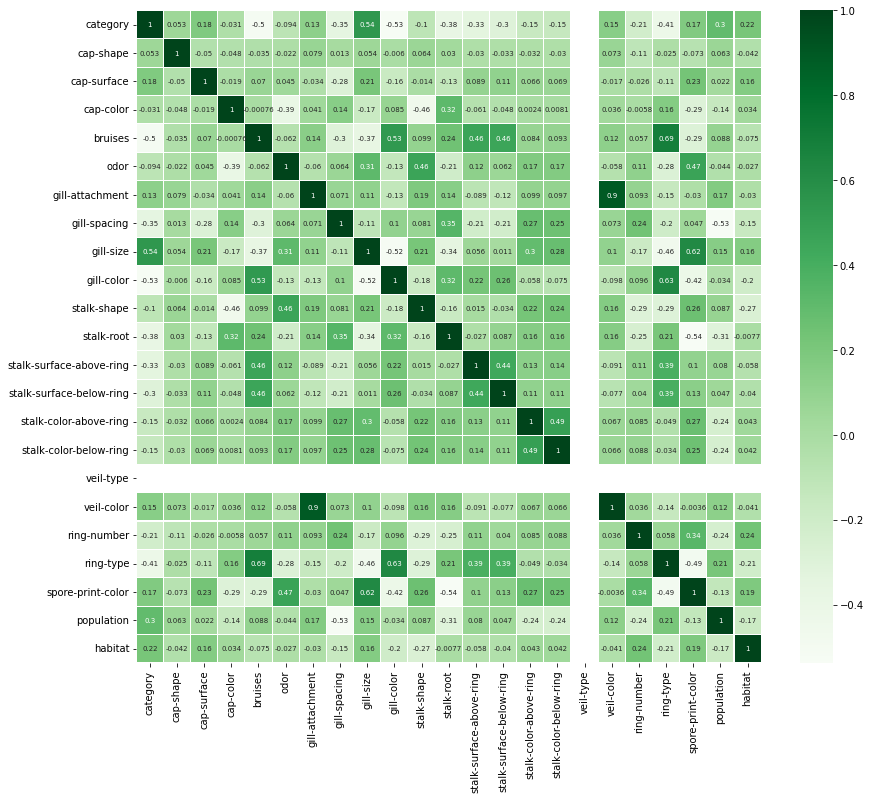

In [48]:
plt.figure(figsize=(14,12))
sns.heatmap(df_mushroom.corr(),linewidths=.1,cmap="Greens", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')

In [49]:
#sns.pairplot(df_mushroom, hue='category');

## Preparing the Data

In [50]:
y = df_mushroom["category"].values
x = df_mushroom.drop(["category"], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# Classification Methods


## 1. Decision Tree Classification

In [51]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(x_test, y_test)*100, 2)))

print("ACCURACY:",accuracy_score(y_test, y_pred_dt))
print("RECALL:",recall_score(y_test, y_pred_dt, average="binary"))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Test Accuracy: 100.0%
ACCURACY: 1.0
RECALL: 1.0


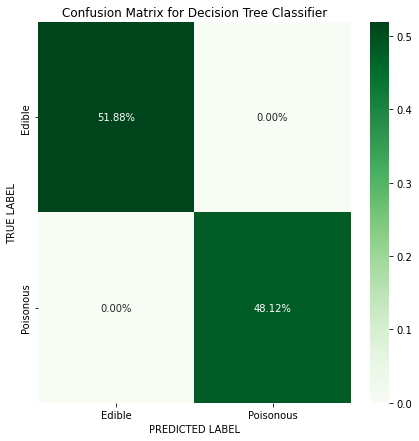

In [53]:
cm = confusion_matrix(y_test, y_pred_dt)#palette="crest"
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

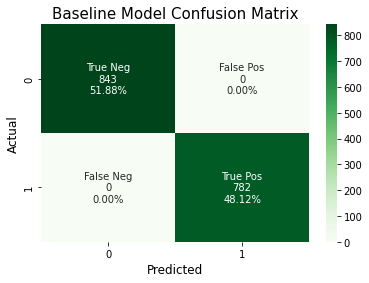

In [54]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
baseline_cm2 = sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')
baseline_cm2.set_title('Baseline Model Confusion Matrix', size =15) 
baseline_cm2.set_xlabel('Predicted', size= 12) 
baseline_cm2.set_ylabel('Actual', size= 12)
baseline_cm2.figure.savefig("BaselineCM.png")

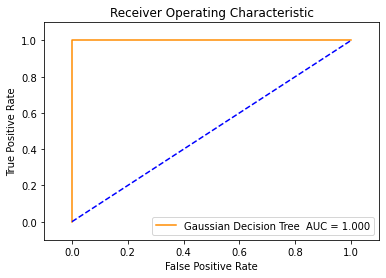

In [55]:
def roc_curve_acc(y_test, Y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(y_test, y_pred_dt, "Gaussian Decision Tree ")

## 2. Logistic Regression Classification

In [56]:
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))



Test Accuracy: 94.65%


In [57]:
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))
print("ACCURACY:",accuracy_score(y_test, y_pred_lr))
print("RECALL:",recall_score(y_test, y_pred_lr, average="binary"))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.94       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

ACCURACY: 0.9464615384615385
RECALL: 0.9462915601023018


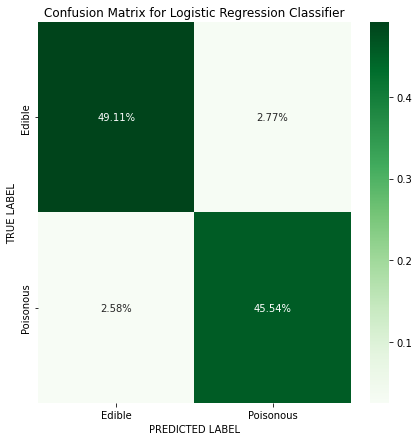

In [58]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

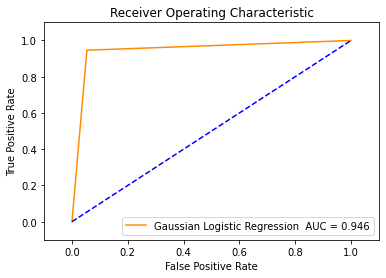

In [59]:
roc_curve_acc(y_test, y_pred_lr, "Gaussian Logistic Regression ")

## 3. KNN Classification


In [60]:
best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i

print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [61]:
y_pred_knn = knn.predict(x_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))
print("ACCURACY:",accuracy_score(y_test, y_pred_knn))
print("RECALL:",recall_score(y_test, y_pred_knn, average="binary"))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

ACCURACY: 0.9963076923076923
RECALL: 1.0


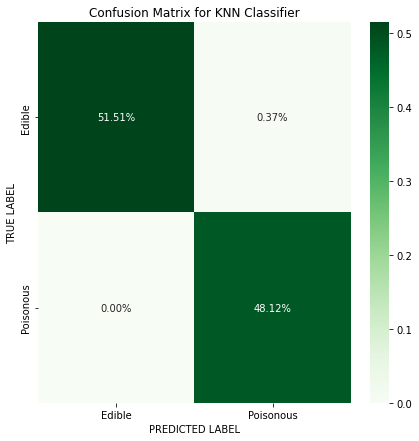

In [62]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

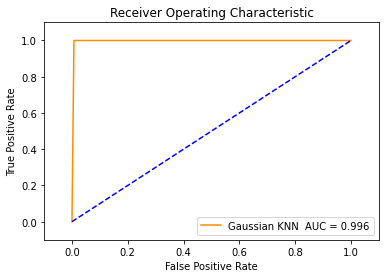

In [63]:
roc_curve_acc(y_test, y_pred_knn, "Gaussian KNN ")

## 4. SVM Classification

In [64]:
# SVM model
svm = SVC(random_state=3, probability=True)
svm.fit(x_train,y_train)
print("svm Train score : ",svm.score(x_test,y_test))
print("svm Test score: ",svm.score(x_test,y_test))
y_pred_svm = svm.predict(x_test)
recall= recall_score(y_test, y_pred_svm, average="binary")


svm Train score :  0.9926153846153846
svm Test score:  0.9926153846153846


In [65]:
# classification report for SVM
print(classification_report(y_test, y_pred_svm, digits=3, zero_division = 1))
acc_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average="binary")
print("ACCURACY:",accuracy_score(y_test, y_pred_svm))
print("RECALL:",recall_score(y_test, y_pred_svm, average="binary"))

              precision    recall  f1-score   support

           0      0.987     0.999     0.993       843
           1      0.999     0.986     0.992       782

    accuracy                          0.993      1625
   macro avg      0.993     0.992     0.993      1625
weighted avg      0.993     0.993     0.993      1625

ACCURACY: 0.9926153846153846
RECALL: 0.9859335038363172


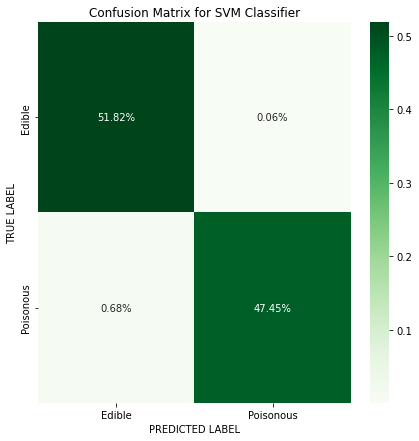

In [66]:
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

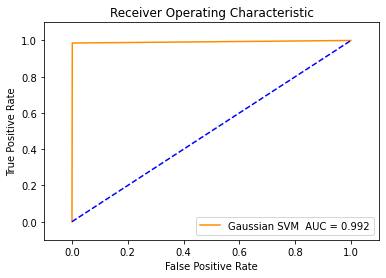

In [67]:
roc_curve_acc(y_test, y_pred_svm, "Gaussian SVM ")

## 5. Naive Bayes Classification

In [68]:
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 92.18%


In [69]:
y_pred_nb = nb.predict(x_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))
print("ACCURACY:",accuracy_score(y_test, y_pred_nb))
print("RECALL:",recall_score(y_test, y_pred_nb, average="binary"))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

ACCURACY: 0.9218461538461539
RECALL: 0.9296675191815856


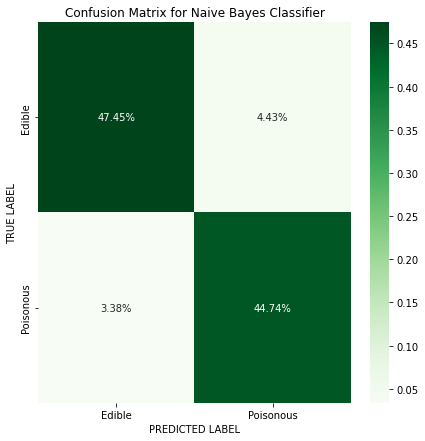

In [70]:
cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

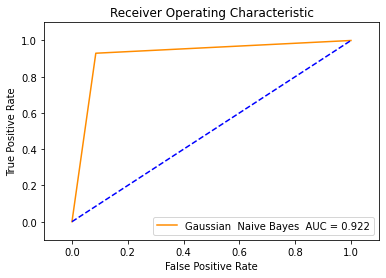

In [71]:
roc_curve_acc(y_test, y_pred_nb, "Gaussian  Naive Bayes ")

## 6. Random Forest Classification

In [72]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [73]:
y_pred_rf = rf.predict(x_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))
print("ACCURACY:",accuracy_score(y_test, y_pred_rf))
print("RECALL:",recall_score(y_test, y_pred_rf, average="binary"))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

ACCURACY: 1.0
RECALL: 1.0


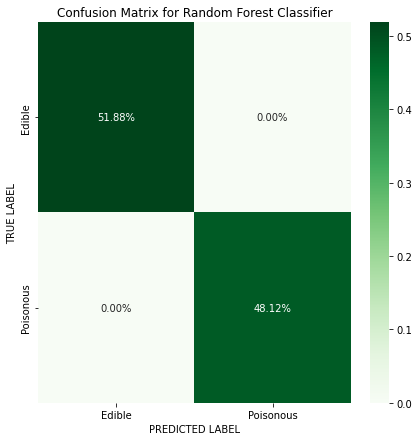

In [74]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

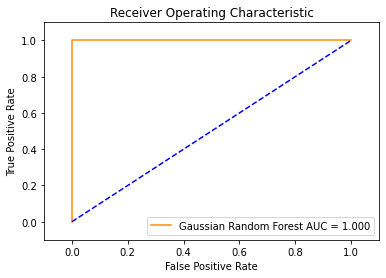

In [75]:
roc_curve_acc(y_test, y_pred_rf, "Gaussian Random Forest")


## xGBOOST

In [76]:
xg=XGBClassifier(verbosity=0)
xg.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(xg.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [77]:
y_pred_xg = xg.predict(x_test)
print("xGBOOST Classifier report: \n\n", classification_report(y_test, y_pred_lr))
print("ACCURACY:",accuracy_score(y_test, y_pred_xg))
print("RECALL:",recall_score(y_test, y_pred_xg, average="binary"))

xGBOOST Classifier report: 

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.94       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

ACCURACY: 1.0
RECALL: 1.0


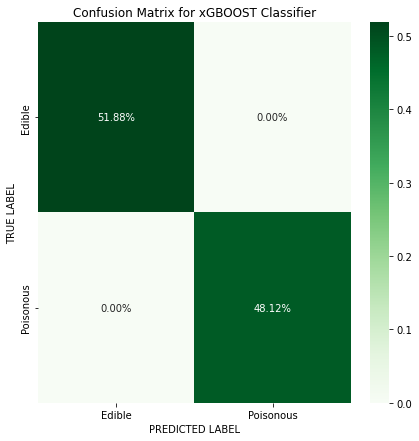

In [78]:
cm = confusion_matrix(y_test, y_pred_xg)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for xGBOOST Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

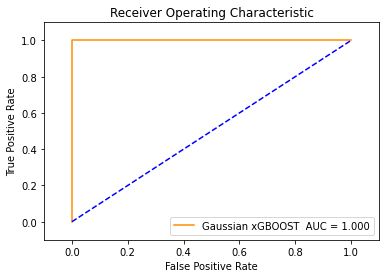

In [79]:
roc_curve_acc(y_test, y_pred_xg, "Gaussian xGBOOST ")

# **Models And ROC** 


In [80]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [81]:
lg_eval = evaluate_model(lr, x_test, y_test)
knn_eval = evaluate_model(knn, x_test, y_test)
nb_eval = evaluate_model(nb, x_test, y_test)
dt_eval = evaluate_model(dt, x_test, y_test)
svm_eval = evaluate_model(svm, x_test, y_test)
xg_eval = evaluate_model(xg, x_test, y_test)



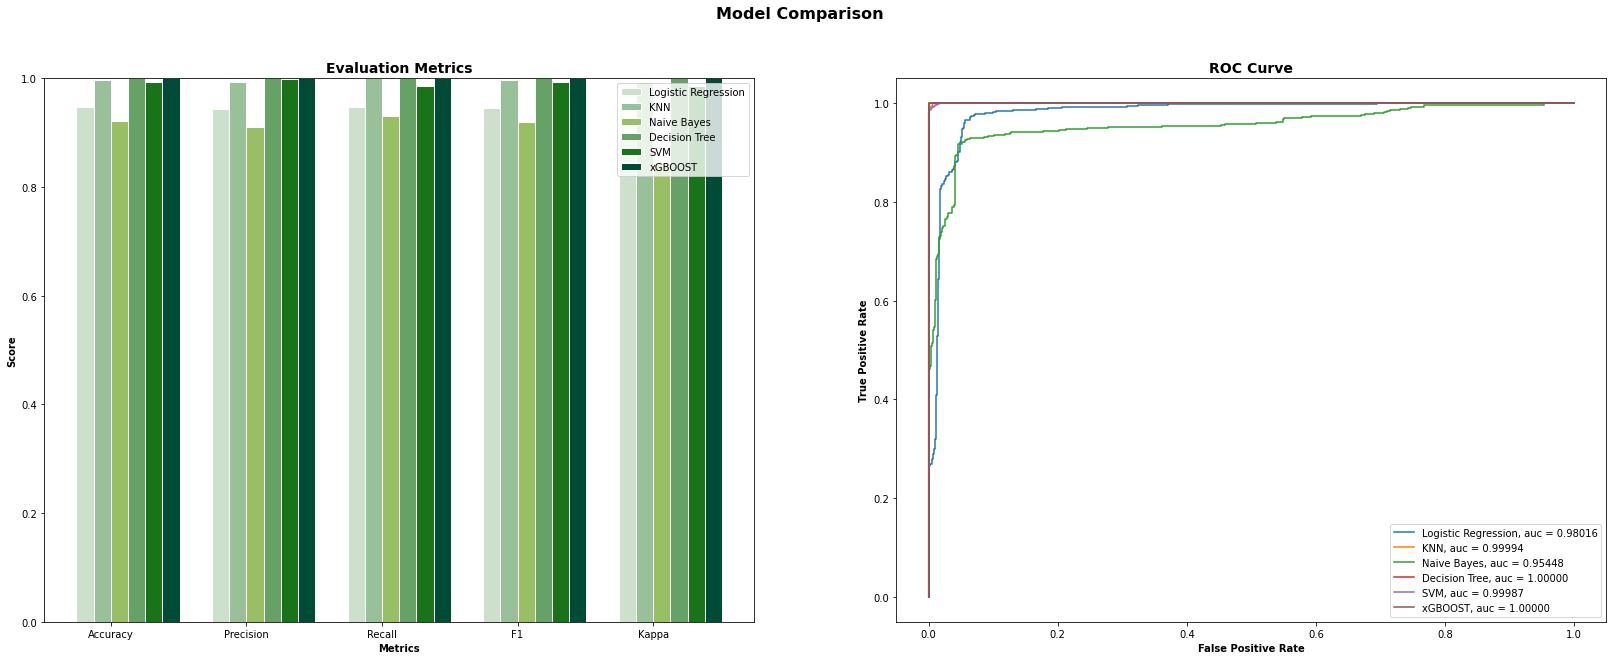

In [82]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(10)
fig.set_figwidth(28)
fig.set_facecolor('white')



# First plot
## set bar size
barWidth = 0.127
lg_score = [lg_eval['acc'], lg_eval['prec'], lg_eval['rec'], lg_eval['f1'], lg_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
dt_score = [dt_eval['acc'], dt_eval['prec'], dt_eval['rec'], dt_eval['f1'], dt_eval['kappa']]
svm_score = [svm_eval['acc'], svm_eval['prec'], svm_eval['rec'], svm_eval['f1'], svm_eval['kappa']]
xg_score = [xg_eval['acc'], xg_eval['prec'], xg_eval['rec'], xg_eval['f1'], xg_eval['kappa']]



## Set position of bar on X axis
r1 = np.arange(len(lg_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]


## Make the plot
ax1.bar(r1, lg_score, width=barWidth, edgecolor='white', label='Logistic Regression',color = "#cce0cc")
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='KNN',color = "#99c199")
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes', color = "#98bf64")
ax1.bar(r4, dt_score, width=barWidth, edgecolor='white', label='Decision Tree',color = "#66a266")
ax1.bar(r5, svm_score, width=barWidth, edgecolor='white', label='SVM',color = "#197419")
ax1.bar(r6, xg_score, width=barWidth, edgecolor='white', label='xGBOOST',color = "#004b35")




## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(lg_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(lg_eval['fpr'], lg_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lg_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='KNN, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_eval['auc']))
ax2.plot(svm_eval['fpr'], svm_eval['tpr'], label='SVM, auc = {:0.5f}'.format(svm_eval['auc']))
ax2.plot(xg_eval['fpr'], xg_eval['tpr'], label='xGBOOST, auc = {:0.5f}'.format(xg_eval['auc']))



## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Summary of models

In [83]:
models_list = [dt,
               lr,
               knn,
               svm,
               nb,
               xg ]



In [84]:
models = []
accuracies = []
precisions = []
recalls = []
roc_scores = []
f1_scores = []
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for model in models_list:
    
    if(model == models_list[-1]):
        count_vectorizer = CountVectorizer(ngram_range=(1, 2),  max_df = 0.6)
    accuracy = model.score(x_test, y_test)  #get accuracy
    y_pred = model.predict(x_test) #get predictions
    model_name = type(model).__name__
    print("Accuracy("+ model_name + "): ", accuracy.round(4)) #display accuracy
    print("F1 score("+ model_name + "): ", f1_score(y_test,y_pred).round(4)) #display F1
    print("Precision("+ model_name + "): ", precision_score(y_test,y_pred).round(4)) #display precision
    print("Recall("+ model_name + "): ",recall_score(y_test,y_pred).round(4)) #display recall
    print("ROC Score("+ model_name + "): ",roc_auc_score(y_test,y_pred).round(4)) #display recall
    
    print("\n")
    models.append(model_name)
    accuracies.append(accuracy.round(4))
    f1_scores.append(f1_score(y_test,y_pred).round(4))
    precisions.append(precision_score(y_test,y_pred).round(4))
    recalls.append(recall_score(y_test,y_pred).round(4))
    roc_scores.append(roc_auc_score(y_test,y_pred).round(4))



Accuracy(DecisionTreeClassifier):  1.0
F1 score(DecisionTreeClassifier):  1.0
Precision(DecisionTreeClassifier):  1.0
Recall(DecisionTreeClassifier):  1.0
ROC Score(DecisionTreeClassifier):  1.0


Accuracy(LogisticRegression):  0.9465
F1 score(LogisticRegression):  0.9445
Precision(LogisticRegression):  0.9427
Recall(LogisticRegression):  0.9463
ROC Score(LogisticRegression):  0.9465


Accuracy(KNeighborsClassifier):  0.9963
F1 score(KNeighborsClassifier):  0.9962
Precision(KNeighborsClassifier):  0.9924
Recall(KNeighborsClassifier):  1.0
ROC Score(KNeighborsClassifier):  0.9964


Accuracy(SVC):  0.9926
F1 score(SVC):  0.9923
Precision(SVC):  0.9987
Recall(SVC):  0.9859
ROC Score(SVC):  0.9924


Accuracy(GaussianNB):  0.9218
F1 score(GaussianNB):  0.9197
Precision(GaussianNB):  0.9099
Recall(GaussianNB):  0.9297
ROC Score(GaussianNB):  0.9221


Accuracy(XGBClassifier):  1.0
F1 score(XGBClassifier):  1.0
Precision(XGBClassifier):  1.0
Recall(XGBClassifier):  1.0
ROC Score(XGBClassifier)

In [85]:
results = pd.DataFrame({"Model" : models, "Accuracy" : accuracies,"F1" : f1_scores, "Precision" : precisions, "Recall" : recalls, 'ROC Score' :roc_scores})
results

,Model,Accuracy,F1,Precision,Recall,ROC Score
0,DecisionTreeClassifier,1.0000,1.0000,1.0000,1.0000,1.0000
1,LogisticRegression,0.9465,0.9445,0.9427,0.9463,0.9465
2,KNeighborsClassifier,0.9963,0.9962,0.9924,1.0000,0.9964
3,SVC,0.9926,0.9923,0.9987,0.9859,0.9924
4,GaussianNB,0.9218,0.9197,0.9099,0.9297,0.9221
5,XGBClassifier,1.0000,1.0000,1.0000,1.0000,1.0000


# Predictions
Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree Classifier.

In [86]:
preds = dt.predict(x_test)
print(preds[:36])
print(y_test[:36])

# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


## As we can see, the predicted and the true values match 100%.

# Conclusion
From the confusion matrix, we saw that our train and test data is balanced.
Most of the classification methods hit 100% accuracy with this dataset.
Woohoo! Congratulations!!!
We can now eat healthy mushrooms!!
YAY!

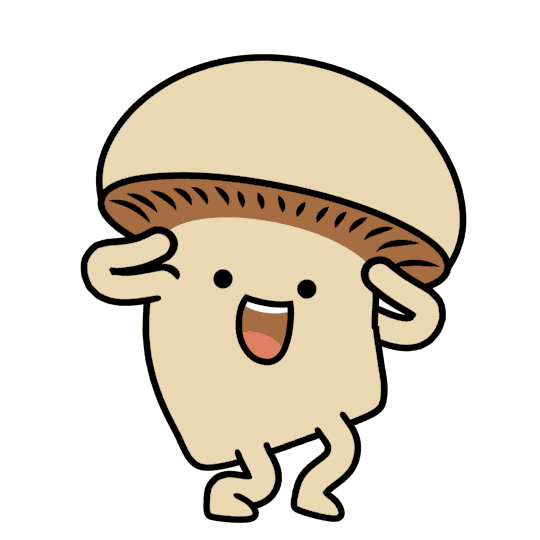